<br></br>

<p style="font-family: Arial; font-size:3em; color:red; text-align: center">
    <strong>
        Predicting The Type & Location Of a New Venue
    </strong>
</p>

<br></br>
<p style="font-family: Arial; font-size:3em; padding=0.1em color:black; text-align: center">
    <em>
         Piotr Zubrzycki
    </em>
</p>

<br></br>
<p style="font-family: Arial; font-size:2em; padding=0.1em color:black; text-align: center">
    <em>
         January 11, 2020
    </em>
</p>
<br></br>

<br></br>
<p style="font-family: Arial; font-size:2.5em; padding=0em color:black; text-align: left">
    <strong>
         1. Introduction/Business Problem
    </strong>
</p>

<br></br>
<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         1.1 Background
    </em>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Decision what type of place to open, and where it should be located, is crucial when preparing business plan for a new project. It is hard to keep track and understand which places have the biggest financial potential. Each year new or different businesses might be more popular than the others. Without proper analysis of the trends over the years, it is almost impossible to be sure that some particular type of venue is potentially more profitable than the others. It is also extremely important to know, where the new venue, which we would like to invest in, should be located. Because it is impossible to have an access to the financial records of each venue, it could be assumed that the number of visitors at some particular place (popularity) corresponds to the income. Also by utilization of location data, the optimal area in reference to city centre and main train station could be chosen.
    </em>
</p>
<br></br>

<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         1.2 Problem
    </em>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Data that might contribute to determine what business should be opened, in the particular city, based on number of citizens, might include number of visitors and its location in reference to the city centre and main train station.
This project aims to predict what type of venue investor should invest in. 
    </em>
</p>
<br></br>

<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         1.3 Interest
    </em>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Everyone who thinks about investing into new venue, would be highly interested to see, what types of places are the most popular/profitable, and what is their ideal location.
    </em>
</p>
<br></br>

<br></br>
<p style="font-family: Arial; font-size:2.5em; padding=0em color:black; text-align: left">
    <strong>
         2. Data acquisition
    </strong>
</p>

<br></br>
<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         2.1 Data sources
    </em>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         In different cities different venue types might be popular. This is why, in order to predict what is the best investment in the city of our interest, cities with simian size/population will be chosen for statistical analysis. Information about their population, is extracted from <a href="https://simplemaps.com/data/world-cities">simplemaps.com</a> (worldcities.csv).
Because this file does not include data about size of the cities, it will be assumed that size correlates with population.
Next the most popular venues will be selected based on their popularity. Such information can be extracted from <a href="https://foursquare.com">foursquare.com</a>. Additionally the optimal location will also be chosen based on the coordinates.
This test will be run for several years in order to see what is the trend of the most popular venues.  
    </em>
</p>
<br></br>

<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         2.2 Data examples
    </em>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Population of the cities <br><br> Reading "worldcities.csv"
    </em>
</p>
<br></br>

In [1]:
# The code was removed by Watson Studio for sharing.

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Selecting city we woul dlike to invest in
    </em>
</p>
<br></br>

In [2]:
# City name in ASCII format
city_name = "Krakow"

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Finding cities with similar population
    </em>
</p>
<br></br>

In [3]:
# Sorting pd_city_population dataframe by "population" - descending 
df_city_population.sort_values(by=['population'], ascending=False, inplace=True)
df_city_population.reset_index(inplace=True)  # reseting index
df_city_population.drop(['index'], axis = 1, inplace=True) # dropping "index" column created during "reset_index"
df_city_population.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [4]:
# Checking if 'worldcities.csv' file contains information about searched city
if city_name in list(df_city_population['city_ascii']):
    print('Searched city "{}" exists in "worldcities.csv" file'.format(city_name))
    print(df_city_population.loc[df_city_population['city_ascii'] == city_name])
else:
    print('Searched city "{}" does not exist in "worldcities.csv" file!'.format(city_name))

Searched city "Krakow" exists in "worldcities.csv" file
       city city_ascii      lat      lng country iso2 iso3   admin_name  \
886  Kraków     Krakow  50.0614  19.9372  Poland   PL  POL  Małopolskie   

    capital  population          id  
886   admin    766739.0  1616172264  


In [5]:
# Keeping cities only from the same region/country - selecting countries from other continetns could bias our analysis 
# Thus in our case we will limit cities used for analysis to the same country 
# Country of the selected city "city_name" - could also be done per continent
country = df_city_population[df_city_population['city_ascii'] == city_name]['country']
country = list(country)[0]
df_city_population = df_city_population[df_city_population['country'] == country]
df_city_population.reset_index(inplace=True)  # reseting index
df_city_population.drop(['index'], axis = 1, inplace=True) # dropping "index" column created during "reset_index"


# finding an index of the searched city
city_name_index = df_city_population[df_city_population['city_ascii'] == city_name].index[0]
print('Index of {} is: {}'.format(city_name, city_name_index))

# Finding cities with similar population to the "city_name"
# Number of cities used for analysis is defined by "number_of_cities" paramter 
number_of_cities = 21

max_index = len(list(df_city_population['city_ascii'])) - 1
# Finding idex range of the cities which will be used for analysis
if int(number_of_cities / 2) == number_of_cities / 2:
    lower_index = city_name_index - int(number_of_cities / 2)
    higher_index = city_name_index + int(number_of_cities / 2)
    if lower_index < 0:      
        higher_index = city_name_index + int(number_of_cities / 2) + (abs(lower_index))
        lower_index = 0
    if higher_index > max_index:
        lower_index = city_name_index - int(number_of_cities / 2) - abs(higher_index - max_index)
        higher_index = max_index      
else:
    lower_index = city_name_index - (int(number_of_cities / 2) + 1)
    higher_index = city_name_index + int(number_of_cities / 2)
    if lower_index < 0:      
        higher_index = city_name_index + int(number_of_cities / 2) + (abs(lower_index))
        lower_index = 0
    if higher_index > max_index:
        lower_index = city_name_index - int(number_of_cities / 2) - abs(higher_index - max_index)
        higher_index = max_index
        
print('Index range of cities used for analysis: {}-{}'.format(lower_index, higher_index))


# Print city name, and location of the cities used for analysis
df_cities_for_analysis = df_city_population.loc[lower_index : higher_index][['city_ascii', 'population', 'lat', 'lng']]
df_cities_for_analysis.reset_index(inplace=True)  # reseting index
df_cities_for_analysis.drop(['index'], axis = 1, inplace=True) # dropping "index" column created during "reset_index"
city_name_index = df_cities_for_analysis[df_cities_for_analysis['city_ascii'] == city_name].index[0]
df_cities_for_analysis.drop(df_cities_for_analysis.index[city_name_index], inplace=True)
df_cities_for_analysis.reset_index(inplace=True)  # reseting index
df_cities_for_analysis.drop(['index'], axis = 1, inplace=True) # dropping "index" column created during "reset_index"
df_cities_for_analysis

Index of Krakow is: 1
Index range of cities used for analysis: 0-21


,city_ascii,population,lat,lng
0,Warsaw,1790658.0,52.2167,21.0333
1,Lodz,690422.0,51.7769,19.4547
2,Wroclaw,638586.0,51.1077,17.0353
3,Poznan,538633.0,52.4000,16.9167
4,Gdansk,464254.0,54.3667,18.6333
5,Szczecin,403833.0,53.4247,14.5553
6,Bydgoszcz,358614.0,53.1167,18.0000
7,Lublin,339850.0,51.2333,22.5667
8,Bialystok,297288.0,53.1167,23.1667
9,Katowice,276499.0,50.2500,19.0000


In [6]:
# Installing flolium in order to depict locations of the cities used for analysis
import sys
!{sys.executable} -m pip install folium

     |████████████████████████████████| 94 kB 4.4 MB/s eta 0:00:011


In [7]:
import folium

In [8]:
# create map of Toronto using latitude and longitude values
latitude_starting_zone = df_city_population.loc[df_city_population['city_ascii'] == city_name]['lat']
longitude_starting_zone = df_city_population.loc[df_city_population['city_ascii'] == city_name]['lng']
cities_for_analysis_map = folium.Map(location=[latitude_starting_zone, longitude_starting_zone], zoom_start=5)


# add markers to map - cities used for analyses
for i in range(0, len(df_cities_for_analysis['city_ascii'])):
    label = "{}".format(df_cities_for_analysis['city_ascii'][i])
    # folium label can't hadnmle '`' mark. Needs to be replaced
    if '`' in label:
        label = label.replace("`", "'")
    #print(label) 
    label = folium.Popup(label)
    folium.CircleMarker(
        [df_cities_for_analysis['lat'][i], df_cities_for_analysis['lng'][i]],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(cities_for_analysis_map) 


# add markers to map - city_name (city where we are going to invest)
label = folium.Popup(city_name)
folium.CircleMarker(
    [latitude_starting_zone, longitude_starting_zone],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#ff0000',
    fill_opacity=0.7,
    parse_html=False).add_to(cities_for_analysis_map)
    
cities_for_analysis_map

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        <strong>
         This test was originaly performed on the data from cities arround the worldd. Unformatunatelly most of the data from "analysis cities" come from Asia/China what potentially could bias the result significantly. Thus decision was made to limit cities to the same country (alternativelly test could be conducted for the cities from the same region/continent).
        </strong>
    </em>
</p>
<br></br>

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Cheking what are the most popular venues in selected Cities
    </em>
</p>
<br></br>

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Next, Foursquare API to explore the neighborhoods and segment them, will be utilized <br><br>
        Define Foursquare Credentials and Version
    </em>
</p>
<br></br>

In [39]:
# The code was removed by Watson Studio for sharing.

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Create a function to get the most popular Venues in some predefined radius
    </em>
</p>
<br></br>

In [31]:
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):   
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        #print(url)
        # make the GET request
        try:
            results = requests.get(url).json()["response"]["groups"][0]["items"]
        except:
            print('Data for city {} & date {} not found in foursqare.com database'.format(name, VERSION))
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            VERSION) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City Name', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Date']
    
    return(nearby_venues)

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Code to run the above function on each neighborhood and create a new dataframe called df_toronto_venues
    </em>
</p>
<br></br>

In [42]:
# creating PandDa dataframe which will store data from all dates
column_names = ['City Name', 
                'City Latitude', 
                'City Longitude', 
                'Venue', 
                'Venue Latitude', 
                'Venue Longitude', 
                'Venue Category',
                'Date']
    
df_cities_for_analysis_venues = pd.DataFrame(columns = column_names)

# Extracting data (most popular places) from different dates - to analyze trend in time 
for VERSION in dates:
    df_cities_for_analysis_venues_per_date = getNearbyVenues(names=df_cities_for_analysis['city_ascii'],
                                   latitudes=df_cities_for_analysis['lat'],
                                   longitudes=df_cities_for_analysis['lng']
                                  )
    df_cities_for_analysis_venues = pd.concat([df_cities_for_analysis_venues, df_cities_for_analysis_venues_per_date])
    print('VERSION: {} Shape: {}'.format(VERSION, df_cities_for_analysis_venues.shape))

20180731
https://api.foursquare.com/v2/venues/explore?&client_id=BPG3JLXYABUB2L0CRCGOKT2HKVAVBWMF2ETDIRQ42NZISHKZ&client_secret=5F0WL2Y0JHMUFFUSQEU44LV3GZAJSQZYZ3PFQ133BYIFRLLF&v=20180731&ll=52.2167,21.0333&radius=5000&limit=500
https://api.foursquare.com/v2/venues/explore?&client_id=BPG3JLXYABUB2L0CRCGOKT2HKVAVBWMF2ETDIRQ42NZISHKZ&client_secret=5F0WL2Y0JHMUFFUSQEU44LV3GZAJSQZYZ3PFQ133BYIFRLLF&v=20180731&ll=51.7769,19.4547&radius=5000&limit=500
https://api.foursquare.com/v2/venues/explore?&client_id=BPG3JLXYABUB2L0CRCGOKT2HKVAVBWMF2ETDIRQ42NZISHKZ&client_secret=5F0WL2Y0JHMUFFUSQEU44LV3GZAJSQZYZ3PFQ133BYIFRLLF&v=20180731&ll=51.1077,17.0353&radius=5000&limit=500
https://api.foursquare.com/v2/venues/explore?&client_id=BPG3JLXYABUB2L0CRCGOKT2HKVAVBWMF2ETDIRQ42NZISHKZ&client_secret=5F0WL2Y0JHMUFFUSQEU44LV3GZAJSQZYZ3PFQ133BYIFRLLF&v=20180731&ll=52.4,16.9167&radius=5000&limit=500
https://api.foursquare.com/v2/venues/explore?&client_id=BPG3JLXYABUB2L0CRCGOKT2HKVAVBWMF2ETDIRQ42NZISHKZ&client_se

In [45]:
## print(df_cities_for_analysis_venues.shape)
df_cities_for_analysis_venues.shape

(2974, 8)

In [23]:
#df_cities_for_analysis_venues.append(df_cities_for_analysis_venues_per_date)
df_cities_for_analysis_venues = pd.concat([df_cities_for_analysis_venues, df_cities_for_analysis_venues_per_date])
df_cities_for_analysis_venues

,City Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Date
0,Warsaw,52.2167,21.0333,Palace On The Isle (Pałac Łazienkowski (Pałac ...,52.214860,21.035599,Palace,20180631
1,Warsaw,52.2167,21.0333,Łazienki Królewskie,52.212892,21.033583,Park,20180631
2,Warsaw,52.2167,21.0333,Agrykola,52.219628,21.033156,Park,20180631
3,Warsaw,52.2167,21.0333,Restauracja Belvedere,52.211478,21.033431,Eastern European Restaurant,20180631
4,Warsaw,52.2167,21.0333,Park Ujazdowski,52.221506,21.025517,Park,20180631
...,...,...,...,...,...,...,...,...
1482,Bielsko-Biala,49.8225,19.0444,Lodomania,49.802840,19.050698,Ice Cream Shop,20180631
1483,Bielsko-Biala,49.8225,19.0444,Shell,49.850034,19.051375,Gas Station,20180631
1484,Bielsko-Biala,49.8225,19.0444,Lotnisko Bielsko Biała,49.806650,19.001435,Airport,20180631
1485,Bielsko-Biala,49.8225,19.0444,MAT-CHEM-BUD Centrum Chemii Budowlanej,49.845690,18.994310,Hardware Store,20180631


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Let's check how many venues were returned for each city
    </em>
</p>
<br></br>

In [50]:
df_cities_for_analysis_venues.groupby(['City Name', 'Date']).count().sort_values(by=['Venue Category'], ascending=False)

City Latitude  City Longitude  Venue  Venue Latitude  \
City Name     Date                                                             
Gdansk        20181031            100             100    100             100   
              20180731            100             100    100             100   
Poznan        20180731            100             100    100             100   
              20181031            100             100    100             100   
Gdynia        20181031            100             100    100             100   
              20180731            100             100    100             100   
Lodz          20181031            100             100    100             100   
              20180731            100             100    100             100   
Torun         20180731            100             100    100             100   
              20181031            100             100    100             100   
Warsaw        20180731            100             100    100             100   
              20181031            100             100    100             100   
Wroclaw       20180731            100             100    100             100   
              20181031            100             100    100             100   
Szczecin      20181031             90              90     90              90   
              20180731             90              90     90              90   
Bialystok     20181031             87              87     87              87   
              20180731             87              87     87              87   
Lublin        20180731             73              73     73              73   
              20181031             73              73     73              73   
Katowice      20181031             71              71     71              71   
              20180731             71              71     71              71   
Olsztyn       20180731             67              67     67              67   
              20181031             67              67     67              67   
Bydgoszcz     20180731             58              58     58              58   
              20181031             58              58     58              58   
Czestochowa   20180731             54              54     54              54   
              20181031             54              54     54              54   
Bielsko-Biala 20180731             53              53     53              53   
              20181031             53              53     53              53   
Rzeszow       20181031             52              52     52              52   
              20180731             52              52     52              52   
Kielce        20180731             48              48     48              48   
              20181031             48              48     48              48   
Gliwice       20181031             44              44     44              44   
              20180731             44              44     44              44   
Radom         20181031             36              36     36              36   
              20180731             36              36     36              36   
Sosnowiec     20181031             31              31     31              31   
              20180731             31              31     31              31   
Zabrze        20180731             23              23     23              23   
              20181031             23              23     23              23   

                        Venue Longitude  Venue Category  
City Name     Date                                       
Gdansk        20181031              100             100  
              20180731              100             100  
Poznan        20180731              100             100  
              20181031              100             100  
Gdynia        20181031              100             100  
              20180731              100             100  
Lodz          20181031              100

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Let's find out how many unique categories/venues there are
    </em>
</p>
<br></br>

In [51]:
print('There are {} uniques categories.'.format(len(df_cities_for_analysis_venues['Venue Category'].unique())))

There are 205 uniques categories.


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Analyze Each City
    </em>
</p>
<br></br>

In [59]:
# one hot encoding
df_cities_for_analysis_venues_onehot = pd.get_dummies(df_cities_for_analysis_venues[['Venue Category']], prefix="", prefix_sep="")

# add 'city name' column back to dataframe
df_cities_for_analysis_venues_onehot['City Name'] = df_cities_for_analysis_venues['City Name'] 

# add 'Date' column back to dataframe
df_cities_for_analysis_venues_onehot['Date'] = df_cities_for_analysis_venues['Date'] 

# move 'city name' column to the first column
fixed_columns = [df_cities_for_analysis_venues_onehot.columns[-1]] + list(df_cities_for_analysis_venues_onehot.columns[:-1])
df_cities_for_analysis_venues_onehot = df_cities_for_analysis_venues_onehot[fixed_columns]

print(df_cities_for_analysis_venues_onehot.shape)
df_cities_for_analysis_venues_onehot.head()

(2974, 207)


,Date,African Restaurant,Airport,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Zoo,City Name
0,20180731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Warsaw
1,20180731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Warsaw
2,20180731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Warsaw
3,20180731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Warsaw
4,20180731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Warsaw


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Grouping rows by 'City Name' & 'Date' and by taking the mean of the frequency of occurrence of each category
    </em>
</p>
<br></br>

In [110]:
df_cities_for_analysis_venues_onehot_grouped = df_cities_for_analysis_venues_onehot.groupby(['City Name', 'Date']).mean().reset_index()
df_cities_for_analysis_venues_onehot_grouped

,City Name,Date,African Restaurant,Airport,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Zoo
0,Bialystok,20180731,0.00,0.011494,0.011494,0.00,0.00,0.000000,0.00,0.00,...,0.011494,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.011494
1,Bialystok,20181031,0.00,0.011494,0.011494,0.00,0.00,0.000000,0.00,0.00,...,0.011494,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.011494
2,Bielsko-Biala,20180731,0.00,0.018868,0.000000,0.00,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
3,Bielsko-Biala,20181031,0.00,0.018868,0.000000,0.00,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
4,Bydgoszcz,20180731,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.017241,0.00,0.00,0.00,0.00,0.000000
5,Bydgoszcz,20181031,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.017241,0.00,0.00,0.00,0.00,0.000000
6,Czestochowa,20180731,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
7,Czestochowa,20181031,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
8,Gdansk,20180731,0.00,0.000000,0.000000,0.00,0.00,0.010000,0.00,0.00,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.01,0.00,0.01,0.00,0.000000
9,Gdansk,20181031,0.00,0.000000,0.000000,0.00,0.00,0.010000,0.00,0.00,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.01,0.00,0.01,0.00,0.000000


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Let's print each City along with the top 5 most common venues
    </em>
</p>
<br></br>

In [158]:
num_top_venues = 5

for index, row in df_cities_for_analysis_venues_onehot_grouped.iterrows():
    city = row['City Name']
    date = row['Date']
    print('-----{} {}-----'.format(city, date))
    temp = df_cities_for_analysis_venues_onehot_grouped[(df_cities_for_analysis_venues_onehot_grouped['City Name'] == city) & (df_cities_for_analysis_venues_onehot_grouped['Date'] == date)].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[2:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-----Bialystok 20180731-----
           venue  freq
0          Hotel  0.09
1            Pub  0.07
2     Restaurant  0.06
3  Shopping Mall  0.05
4    Pizza Place  0.05


-----Bialystok 20181031-----
           venue  freq
0          Hotel  0.09
1            Pub  0.07
2     Restaurant  0.06
3  Shopping Mall  0.05
4    Pizza Place  0.05


-----Bielsko-Biala 20180731-----
                  venue  freq
0  Fast Food Restaurant  0.09
1           Gas Station  0.09
2         Shopping Mall  0.09
3                 Hotel  0.06
4    Italian Restaurant  0.06


-----Bielsko-Biala 20181031-----
                  venue  freq
0  Fast Food Restaurant  0.09
1           Gas Station  0.09
2         Shopping Mall  0.09
3                 Hotel  0.06
4    Italian Restaurant  0.06


-----Bydgoszcz 20180731-----
            venue  freq
0      Restaurant  0.09
1            Café  0.09
2           Hotel  0.07
3  Ice Cream Shop  0.03
4     Coffee Shop  0.03


-----Bydgoszcz 20181031-----
            venue  freq
0   

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Let's put that into a pandas dataframe <br><br>
        First, let's write a function to sort the venues in descending order
    </em>
</p>
<br></br>

In [224]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Now let's create the new dataframe and display the top 10 venues for each City
    </em>
</p>
<br></br>

In [275]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City Name', 'Date']
for i in range(0, num_top_venues):
    if i < 3:
        columns.append('{}{} Most Common Venue'.format(i+1, indicators[i]))
    else:
         columns.append('{}th Most Common Venue'.format(i+1))

        
# create a new dataframe
df_cities_for_analysis_venues_onehot_grouped_sorted = pd.DataFrame(columns=columns)
df_cities_for_analysis_venues_onehot_grouped_sorted[['City Name', 'Date']] = df_cities_for_analysis_venues_onehot_grouped[['City Name', 'Date']]

for i in range(0, df_cities_for_analysis_venues_onehot_grouped.shape[0]):
    df_cities_for_analysis_venues_onehot_grouped_sorted.iloc[i, 2:] = return_most_common_venues(df_cities_for_analysis_venues_onehot_grouped.iloc[i, :], num_top_venues)

df_cities_for_analysis_venues_onehot_grouped_sorted

,City Name,Date,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bialystok,20180731,Hotel,Pub,Restaurant,Shopping Mall,Pizza Place,Coffee Shop,Grocery Store,Fast Food Restaurant,Sushi Restaurant,Music Venue
1,Bialystok,20181031,Hotel,Pub,Restaurant,Shopping Mall,Pizza Place,Coffee Shop,Grocery Store,Fast Food Restaurant,Sushi Restaurant,Music Venue
2,Bielsko-Biala,20180731,Shopping Mall,Fast Food Restaurant,Gas Station,Eastern European Restaurant,Hotel,Italian Restaurant,Hardware Store,Dessert Shop,Restaurant,Multiplex
3,Bielsko-Biala,20181031,Shopping Mall,Fast Food Restaurant,Gas Station,Eastern European Restaurant,Hotel,Italian Restaurant,Hardware Store,Dessert Shop,Restaurant,Multiplex
4,Bydgoszcz,20180731,Restaurant,Café,Hotel,Gas Station,Sushi Restaurant,Burger Joint,Ice Cream Shop,Historic Site,Coffee Shop,Nightclub
5,Bydgoszcz,20181031,Restaurant,Café,Hotel,Gas Station,Sushi Restaurant,Burger Joint,Ice Cream Shop,Historic Site,Coffee Shop,Nightclub
6,Czestochowa,20180731,Fast Food Restaurant,Café,Hotel,Supermarket,Italian Restaurant,Bar,Movie Theater,Train Station,Shopping Mall,Mediterranean Restaurant
7,Czestochowa,20181031,Fast Food Restaurant,Café,Hotel,Supermarket,Italian Restaurant,Bar,Movie Theater,Train Station,Shopping Mall,Mediterranean Restaurant
8,Gdansk,20180731,Hotel,Café,Historic Site,Pizza Place,History Museum,Hostel,Coffee Shop,Cocktail Bar,Beer Bar,Bar
9,Gdansk,20181031,Hotel,Café,Historic Site,Pizza Place,History Museum,Hostel,Coffee Shop,Cocktail Bar,Beer Bar,Bar


<br></br>
<p style="font-family: Arial; font-size:2.5em; padding=0em color:black; text-align: left">
    <strong>
         3. Data Analysis
    </strong>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Main issue with extracted data from <a href="https://foursquare.com">foursquare.com</a> 
        is that they do not consist of number of "check ins" into particular venue (I can't see such information in json file). 
        It significanlty limits whole analysis. 
        Because we do not have this data, it will be assumed, that most viable option from the business perspective, 
        will corelate with the venue which statistically occures the most in analysed cities.  
    </em>
</p>
<br></br>

<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         3.1 Data Manipulation
    </em>
</p>

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Checking what are statistically the most popular venues, in all analyzed cities, for each 'Date'<br><br>
        This way we can see, how trend changes over time
    </em>
</p>
<br></br>

In [217]:
df_cities_for_analysis_venues_onehot_grouped_date = df_cities_for_analysis_venues_onehot.groupby('Date').mean().reset_index()
df_cities_for_analysis_venues_onehot_grouped_date

,Date,African Restaurant,Airport,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Zoo
0,20180731,0.000672,0.00269,0.002017,0.000672,0.001345,0.00538,0.001345,0.000672,0.001345,...,0.01345,0.001345,0.001345,0.000672,0.001345,0.001345,0.001345,0.001345,0.000672,0.002017
1,20181031,0.000672,0.00269,0.002017,0.000672,0.001345,0.00538,0.001345,0.000672,0.001345,...,0.01345,0.001345,0.001345,0.000672,0.001345,0.001345,0.001345,0.001345,0.000672,0.002017


In [220]:
num_top_venues = 5

for index, row in df_cities_for_analysis_venues_onehot_grouped_date.iterrows():
    date = row['Date']
    print('-----{}-----'.format(date))
    temp = df_cities_for_analysis_venues_onehot_grouped_date[df_cities_for_analysis_venues_onehot_grouped_date['Date'] == date].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[2:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-----20180731-----
                  venue  freq
0                  Café  0.07
1                 Hotel  0.06
2  Fast Food Restaurant  0.03
3                  Park  0.03
4         Shopping Mall  0.03


-----20181031-----
                  venue  freq
0                  Café  0.07
1                 Hotel  0.06
2  Fast Food Restaurant  0.03
3                  Park  0.03
4         Shopping Mall  0.03




<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Function to sort the venues grouped by date in descending order 
    </em>
</p>
<br></br>

In [225]:
def return_most_common_venues_date(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Now let's create the new dataframe and display the top 10 venues for each Date
    </em>
</p>
<br></br>

In [226]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Date']
for i in range(0, num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(i+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(i+1))
        
# create a new dataframe
df_cities_for_analysis_venues_onehot_grouped_date_sorted = pd.DataFrame(columns=columns)
df_cities_for_analysis_venues_onehot_grouped_date_sorted[['Date']] = df_cities_for_analysis_venues_onehot_grouped_date[['Date']]

for i in range(0, df_cities_for_analysis_venues_onehot_grouped_date.shape[0]):
    df_cities_for_analysis_venues_onehot_grouped_date_sorted.iloc[i, 1:] = return_most_common_venues_date(df_cities_for_analysis_venues_onehot_grouped_date.iloc[i, :], num_top_venues)

df_cities_for_analysis_venues_onehot_grouped_date_sorted

,Date,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,20180731,Café,Hotel,Park,Restaurant,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Italian Restaurant,Pub
1,20181031,Café,Hotel,Park,Restaurant,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Italian Restaurant,Pub


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Checking how many unique Venues there are for all dates
    </em>
</p>
<br></br>

In [299]:
df_tmp = df_cities_for_analysis_venues_onehot_grouped_date_sorted.iloc[0:, 1:]
cols = df_tmp.columns

unique_venues = []
for i in df_tmp:
    for x in list(df_tmp[i]):
        unique_venues.append(x)
    
unique_venues = set(unique_venues)
unique_venues = list(unique_venues)
print('Unique Venues:{}, Count: {}'.format(unique_venues, len(unique_venues)))

Unique Venues:['Restaurant', 'Hotel', 'Coffee Shop', 'Shopping Mall', 'Pub', 'Café', 'Park', 'Fast Food Restaurant', 'Italian Restaurant', 'Pizza Place'], Count: 10


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Assigning values to venues, from 1 to 10, depending on its popularity
    </em>
</p>
<br></br>

In [311]:
columns = unique_venues
df_final = pd.DataFrame(columns=columns)
df_final[['Date']] = df_cities_for_analysis_venues_onehot_grouped_date_sorted[['Date']]
df_final

,Restaurant,Hotel,Coffee Shop,Shopping Mall,Pub,Café,Park,Fast Food Restaurant,Italian Restaurant,Pizza Place,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180731
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20181031


In [314]:
counter = 0
for i in df_tmp:
    counter += 1
    for j in range(0, len(df_tmp[i])):
        score = 10 / counter   # 10 - becasue we are looking at 10 most popular venues
        #print('{} {}'.format(df_tmp[i][j], score))
        for x in df_final:
            for y in range(0, len(df_final[x])):
                df_final[df_tmp[i][j]] = score

df_final                

,Restaurant,Hotel,Coffee Shop,Shopping Mall,Pub,Café,Park,Fast Food Restaurant,Italian Restaurant,Pizza Place,Date
0,2.5,5.0,1.428571,1.25,1.0,10.0,3.333333,2.0,1.111111,1.666667,20180731
1,2.5,5.0,1.428571,1.25,1.0,10.0,3.333333,2.0,1.111111,1.666667,20181031


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Plotting the result
    </em>
</p>
<br></br>

[]

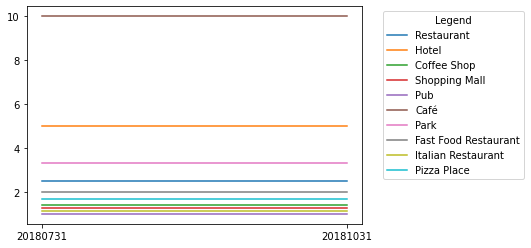

In [329]:
from matplotlib import pyplot as plt

for i in df_final.iloc[0:, :-1]:
    plt.plot(df_final.Date, df_final[i], label=i)

plt.legend(title='Legend', bbox_to_anchor=(1.05, 1))
plt.plot()

<br><br>
<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         3.2 Observation
    </em>
</p>
<br><br>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        From above. grapth it can be noticed that the biggest number of Venuest is of type "Cafe"<br><br>
        Based on above data it looks like there is no change in "popularity" over time among Venue Types.
    </em>
</p>
<br></br>

<br><br>
<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         3.3 Finding the best location for the "most popular" Venue
    </em>
</p>
<br><br>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Now when we know what is the most popular Venue lets find its average distance form the city centre
    </em>
</p>
<br></br>

In [370]:
df_venue_optimize_location = df_cities_for_analysis_venues[['Venue Category', 'City Latitude',  'City Longitude', 'Venue Latitude', 'Venue Longitude']]
df_venue_optimize_location.head()

,Venue Category,City Latitude,City Longitude,Venue Latitude,Venue Longitude
0,Palace,52.2167,21.0333,52.214860,21.035599
1,Park,52.2167,21.0333,52.212892,21.033583
2,Park,52.2167,21.0333,52.219628,21.033156
3,Eastern European Restaurant,52.2167,21.0333,52.211478,21.033431
4,Park,52.2167,21.0333,52.221506,21.025517


In [373]:
# Caffe
df_venue_optimize_location_caffe = df_venue_optimize_location[df_venue_optimize_location['Venue Category'] == 'Café']
print(df_venue_optimize_location_caffe.shape)
df_venue_optimize_location_caffe.head()

(208, 5)


,Venue Category,City Latitude,City Longitude,Venue Latitude,Venue Longitude
28,Café,52.2167,21.0333,52.225629,21.019006
39,Café,52.2167,21.0333,52.236939,21.024575
45,Café,52.2167,21.0333,52.233204,21.010875
59,Café,52.2167,21.0333,52.239527,21.022618
64,Café,52.2167,21.0333,52.222851,20.988527


<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        In order to caluclate the distance between cinty centre and "Venue Category" the "Haversine" formula will be used.
    </em>
</p>
<br></br>

In [396]:
import math
import statistics

# Radius of the Earth in [m]
R = 6373.0 * 1000

distance_list = []
# Calculate distance for each Venue
for index, row in df_venue_optimize_location_caffe.iterrows():
    
    # coordinates
    city_lat = row['City Latitude']
    city_lng = row['City Longitude']
    venue_lat = row['Venue Latitude']
    venue_lng = row['Venue Longitude']
    
    # coordinates in radians
    lat1 = math.radians(city_lat)
    lng1 = math.radians(city_lng)
    lat2 = math.radians(venue_lat)
    lng2 = math.radians(venue_lng)
    
    # change in coordinates
    dlat = lat2 - lat1
    dlng = lng2 - lng1
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlng / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    #print('distance: {}'.format(distance))
    distance_list.append(distance)
    

venue_loc_median = statistics.median(distance_list)
venue_loc_mean = statistics.mean(distance_list)
print('Median of the distance:\t{:.2f}'.format(venue_loc_median)) 
print('Mean of the distance:\t{:.2f}'.format(venue_loc_mean))



Median of the distance:	1425.24
Mean of the distance:	1599.94


<br><br>
<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         3.4 Printing the area of interenst over the "city_name"
    </em>
</p>
<br><br>

In [423]:
# create map of Toronto using latitude and longitude values
latitude_starting_zone = df_city_population.loc[df_city_population['city_ascii'] == city_name]['lat']
longitude_starting_zone = df_city_population.loc[df_city_population['city_ascii'] == city_name]['lng']
venue_best_location_map = folium.Map(location=[latitude_starting_zone, longitude_starting_zone], zoom_start=12)

# Best place for Venue Cafe highlited below
folium.Circle(
    [latitude_starting_zone, longitude_starting_zone],
    radius=venue_loc_median-100,
    color='red',
    fill=False,
    fill_opacity=1,
    ).add_to(venue_best_location_map)

    
venue_best_location_map

<br></br>
<p style="font-family: Arial; font-size:2.5em; padding=0em color:black; text-align: left">
    <strong>
         4. Conclusion
    </strong>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Based on above analysis, we can see that venue: "Cofe" will bne the best investment.<br><br>
        Its ideal location should be close to the city centre. 
    </em>
</p>
<br></br>